In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

# Understand the Eurythmy Performed in Measurements

## Data import

In [3]:
meas_eurythmy_path= r"../../data/interim/measurements_with_eurythmy.csv"
figures_folder= r"../../reports/figures/"

In [4]:
df = pd.read_csv(meas_eurythmy_path, index_col='id_measurement')

In [17]:
df.shape

(625, 70)

In [23]:
df.head()

,id_performance,datetime,plant,generation,wav_file,num_eurythmy,A1_start,A1_end,G1_start,G1_end,D1_start,D1_end,A2_start,A2_end,G2_start,G2_end,D2_start,D2_end,A3_start,A3_end,G3_start,G3_end,D3_start,D3_end,A4_start,A4_end,G4_start,G4_end,D4_start,D4_end,O1_start,O1_end,O2_start,O2_end,O3_start,O3_end,O4_start,O4_end,L1_start,L1_end,L2_start,L2_end,L3_start,L3_end,L4_start,L4_end,eurythmy_start,eurythmy_end,A1_duration,G1_duration,D1_duration,A2_duration,G2_duration,D2_duration,A3_duration,G3_duration,D3_duration,A4_duration,G4_duration,D4_duration,O1_duration,O2_duration,O3_duration,O4_duration,L1_duration,L2_duration,L3_duration,L4_duration,eurythmy_duration,is_decreasing,count_letters
id_measurement,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,2023-04-29,salad,1,#1_#1_230429_SE1_M1_BYB_Recording_2023-04-29_1...,1,17,26,27,36,37,46,47,56,57,66,67,77,79,88,89,98,99,110,112.0,120.0,121.0,131.0,132.0,143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,143.0,9,9,9,9,9,10,9,9,11,8.0,10.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0,True,12
2,1,2023-04-29,salad,1,#1_#2_230429_SE1_M1_BYB_Recording_2023-04-29_1...,1,17,26,27,36,37,46,47,56,57,66,67,77,79,88,89,98,99,110,112.0,120.0,121.0,131.0,132.0,143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,143.0,9,9,9,9,9,10,9,9,11,8.0,10.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0,True,12
3,1,2023-04-29,salad,1,#1_#3_230429_SE1_M1_BYB_Recording_2023-04-29_1...,1,17,26,27,36,37,46,47,56,57,66,67,77,79,88,89,98,99,110,112.0,120.0,121.0,131.0,132.0,143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,143.0,9,9,9,9,9,10,9,9,11,8.0,10.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0,True,12
4,1,2023-04-29,salad,2,#1_#4_230429_SK2_M1_BYB_Recording_2023-04-29_1...,0,17,26,27,36,37,46,47,56,57,66,67,77,79,88,89,98,99,110,112.0,120.0,121.0,131.0,132.0,143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,143.0,9,9,9,9,9,10,9,9,11,8.0,10.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0,True,12
5,1,2023-04-29,salad,2,#1_#5_230429_SK2_M2_BYB_Recording_2023-04-29_1...,0,17,26,27,36,37,46,47,56,57,66,67,77,79,88,89,98,99,110,112.0,120.0,121.0,131.0,132.0,143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,143.0,9,9,9,9,9,10,9,9,11,8.0,10.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0,True,12


In [7]:
df['plant'].value_counts()

plant
salad     270
tomato    182
basil     173
Name: count, dtype: int64

In [25]:
# Assuming df is your DataFrame
new_df = df[(df['count_letters'] != 12) & (df['count_letters'] != 16)]
new_df.shape

(181, 71)

In [26]:
new_df.head(190)

,id_performance,datetime,plant,generation,wav_file,num_eurythmy,A1_start,A1_end,G1_start,G1_end,D1_start,D1_end,A2_start,A2_end,G2_start,G2_end,D2_start,D2_end,A3_start,A3_end,G3_start,G3_end,D3_start,D3_end,A4_start,A4_end,G4_start,G4_end,D4_start,D4_end,O1_start,O1_end,O2_start,O2_end,O3_start,O3_end,O4_start,O4_end,L1_start,L1_end,L2_start,L2_end,L3_start,L3_end,L4_start,L4_end,eurythmy_start,eurythmy_end,A1_duration,G1_duration,D1_duration,A2_duration,G2_duration,D2_duration,A3_duration,G3_duration,D3_duration,A4_duration,G4_duration,D4_duration,O1_duration,O2_duration,O3_duration,O4_duration,L1_duration,L2_duration,L3_duration,L4_duration,eurythmy_duration,is_decreasing,count_letters
id_measurement,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,2,2023-04-29,salad,1,#2_#7_230429_SJ1_M1_BYB_Recording_2023-04-29_1...,1,10,20,21,30,32,43,46,55,56,65,66,75,80,89,90,98,99,109,112.0,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,121.0,10,9,11,9,9,9,9,8,10,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,True,10
8,2,2023-04-29,salad,1,#2_#8_230429_SJ1_M1_BYB_Recording_2023-04-29_1...,1,10,20,21,30,32,43,46,55,56,65,66,75,80,89,90,98,99,109,112.0,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,121.0,10,9,11,9,9,9,9,8,10,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,True,10
9,2,2023-04-29,salad,1,#2_#9_230429_SJ1_M1_BYB_Recording_2023-04-29_1...,1,10,20,21,30,32,43,46,55,56,65,66,75,80,89,90,98,99,109,112.0,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,121.0,10,9,11,9,9,9,9,8,10,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,True,10
10,2,2023-04-29,salad,1,#2_#10_230429_SK1_M1_BYB_Recording_2023-04-29_...,0,10,20,21,30,32,43,46,55,56,65,66,75,80,89,90,98,99,109,112.0,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,121.0,10,9,11,9,9,9,9,8,10,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,True,10
11,2,2023-04-29,salad,1,#2_#11_230429_SK1_M2_BYB_Recording_2023-04-29_...,0,10,20,21,30,32,43,46,55,56,65,66,75,80,89,90,98,99,109,112.0,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,121.0,10,9,11,9,9,9,9,8,10,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,True,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,106,2023-09-30,salad,4,#106_#615_230930_SE4_M_BYB_Recording_2023-09-3...,1,12,24,26,35,36,46,49,59,61,70,72,81,84,95,97,106,107,117,119.0,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,129.0,12,9,10,10,9,9,11,9,10,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,True,10
616,106,2023-09-30,salad,4,#106_#616_230930_SE4_M_BYB_Recording_2023-09-3...,1,12,24,26,35,36,46,49,59,61,70,72,81,84,95,97,106,107,117,119.0,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,129.0,12,9,10,10,9,9,11,9,10,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,True,10
617,106,2023-09-30,salad,4,#106_#617_230930_SK4_M_BYB_Recording_2023-09-3...,0,12,24,26,35,36,46,49,59,61,70,72,81,84,95,97,106,107,117,119.0,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,129.0,12,9,10,10,9,9,11,9,10,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,True,10


In [27]:
new_df['id_performance'].value_counts()

id_performance
2      6
68     6
99     6
98     6
95     6
94     6
91     6
90     6
87     6
86     6
79     6
78     6
76     6
16     6
69     6
67     6
66     6
63     6
62     6
59     6
58     6
49     6
48     6
44     6
43     6
38     6
37     6
106    6
77     5
82     4
83     4
Name: count, dtype: int64

## Data Comprehension

In [20]:
# Get a new list of the column names that represent the letters
all_columns = df.columns.tolist()
start_index = all_columns.index('A1_duration')
end_index = all_columns.index('L4_duration')-1
durations_starts_ends = all_columns[start_index:end_index]

In [22]:
df['count_letters'] = df[durations_starts_ends].apply(lambda row: (row > 1).sum(), axis=1)

In [24]:
sum_count_letters_by_plant = df.groupby('plant')['count_letters'].sum()

print(sum_count_letters_by_plant)

plant
basil     2442
salad     3216
tomato    2894
Name: count_letters, dtype: int64


### Eurythmy Letter Gestures

Calculate duration of eurythmy gestures

In [10]:
# Get a new list of the column names that represent the letters
all_columns = df.columns.tolist()
start_index = all_columns.index('A1_start')
end_index = all_columns.index('eurythmy_start')-1
letters_starts_ends = all_columns[start_index:end_index]

# Create letter duration
for letter in letters_starts_ends:
    # Extract the letter identifier (assuming it's the first part of the column name)
    letter_id = letter.split('_')[0]

    # Calculate the duration and create a new column
    df[f'{letter_id}_duration'] = df[f'{letter_id}_end'] - df[f'{letter_id}_start']

# Extract unique letter identifiers
unique_letters = set(letter.split('_')[0] for letter in letters_starts_ends)

# Convert the set back to a list, if needed
unique_letters = sorted(list(unique_letters))

Group all similar letters

In [11]:
# Create a dictionary to store data grouped by the first letter
data_by_letter = {}

# Populate the dictionary with data
for letter in unique_letters:
    # Construct the duration column name
    duration_col = f'{letter}_duration'

    # Determine the data range and set integer bins accordingly
    data = df[duration_col].dropna().astype(int)
    
    # Get the first letter
    first_letter = letter[0]

    # Add the data to the corresponding letter's group in the dictionary
    if first_letter not in data_by_letter:
        data_by_letter[first_letter] = []
    data_by_letter[first_letter].extend(data)

Plot histograms of the letters

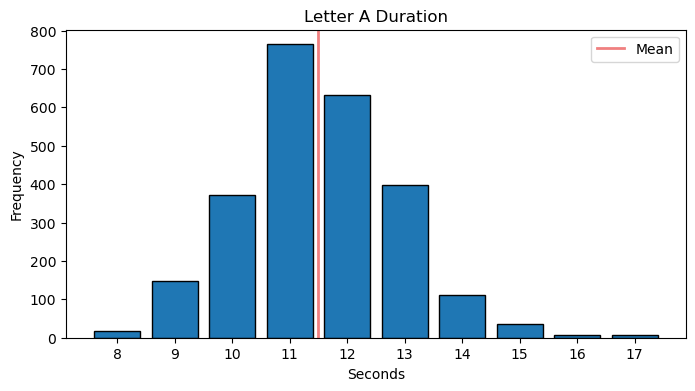

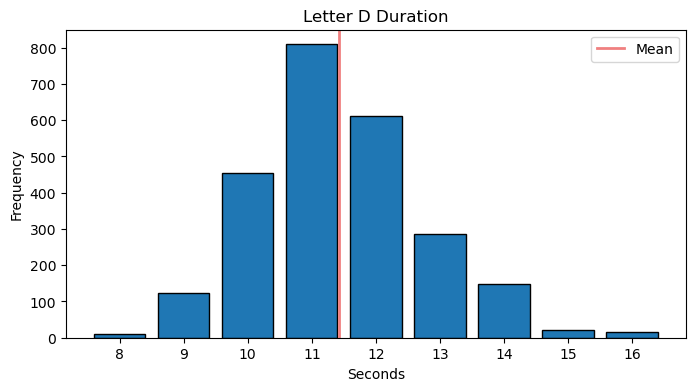

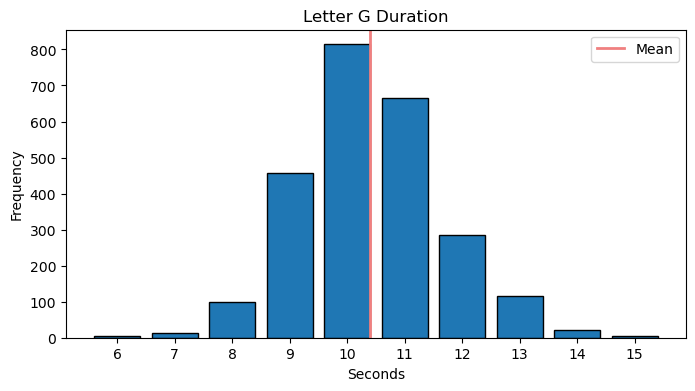

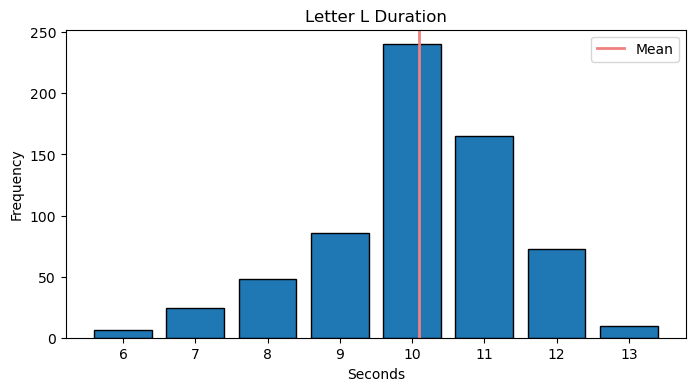

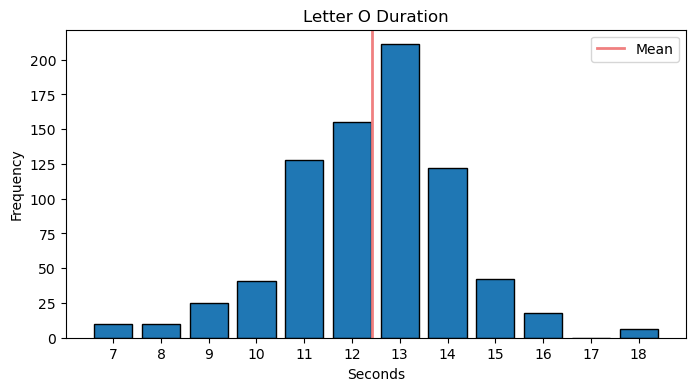

In [12]:
# Create histograms for each group of letters
for first_letter, data in data_by_letter.items():
    # Determine the data range and set integer bins accordingly
    data_range = int(max(data)) - int(min(data))
    bins = np.arange(int(min(data)), int(max(data)) + 2, 1)

    # Calculate the mean of the data
    mean_value = np.mean(data)

    # Plot the histogram for the current group of letters with integer bins
    plt.figure(figsize=(8, 4))  # Optional: Adjust figure size
    n, bins, patches = plt.hist(data, bins=bins, edgecolor='black', align='left', rwidth=0.8)  # Use align='left' and adjust rwidth
    plt.title(f'Letter {first_letter} Duration')
    plt.xlabel('Seconds')
    plt.ylabel('Frequency')
    
    # Set x-axis ticks to display only integers
    plt.xticks(np.arange(int(min(data)), int(max(data)) + 1, 1))

    # Add a red vertical line for the mean
    plt.axvline(mean_value, color='lightcoral', linestyle='solid', linewidth=2, label='Mean')
    plt.legend()  # Show the legend with the mean line
    file_path= os.path.join(figures_folder, f'letter_{first_letter}_duration_histogram')
    plt.savefig(file_path)
    plt.show()

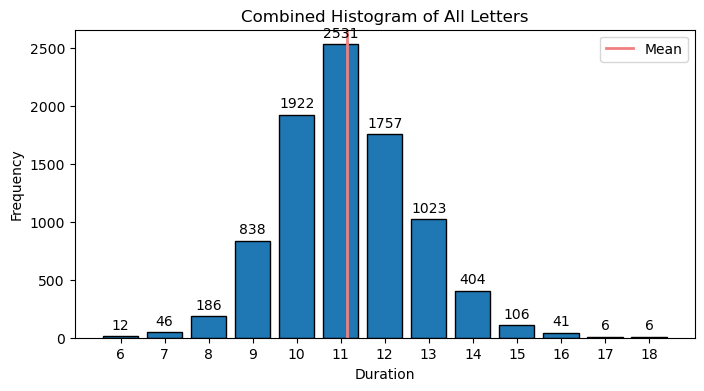

In [13]:
# Create a dictionary to store data grouped by the first letter
data_by_letter = {}

# Populate the dictionary with data
for letter in unique_letters:
    # Construct the duration column name
    duration_col = f'{letter}_duration'

    # Determine the data range and set integer bins accordingly
    data = df[duration_col].dropna().astype(int)
    
    # Get the first letter
    first_letter = letter[0]

    # Add the data to the corresponding letter's group in the dictionary
    if first_letter not in data_by_letter:
        data_by_letter[first_letter] = []
    data_by_letter[first_letter].extend(data)

# Create a histogram for all letters combined
all_data = [data for data_list in data_by_letter.values() for data in data_list]
data_range = int(max(all_data)) - int(min(all_data))
bins = np.arange(int(min(all_data)), int(max(all_data)) + 2, 1)

# Calculate the mean of the data
mean_value = np.mean(all_data)

plt.figure(figsize=(8, 4))  # Optional: Adjust figure size
n, bins, patches = plt.hist(all_data, bins=bins, edgecolor='black', align='left', rwidth=0.8)
plt.title('Combined Histogram of All Letters')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.axvline(mean_value, color='lightcoral', linestyle='solid', linewidth=2, label='Mean')
plt.legend()  # Show the legend with the mean line
plt.xticks(np.arange(int(min(all_data)), int(max(all_data)) + 1, 1))

# Annotate each bar with its frequency
for count, rect in zip(n, patches):
    height = rect.get_height()
    plt.annotate(f'{int(count)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
file_path= os.path.join(figures_folder, 'letter_duration_histogram')
plt.savefig(file_path)
plt.show()


### Eurythmy Performances

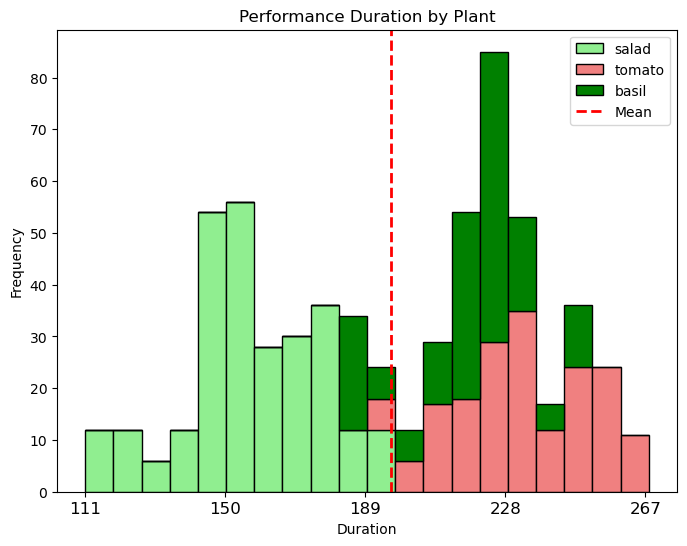

In [14]:
# Define your colors dictionary
colors = {'salad': 'lightgreen', 'tomato': 'lightcoral', 'basil': 'green'}

# Calculate 'eurythmy_duration' as before
df['eurythmy_duration'] = df['eurythmy_end'] - df['eurythmy_start']

# Prepare data for stacked histogram
plant_types = df['plant'].unique()
hist_data = [df[df['plant'] == plant]['eurythmy_duration'].dropna().astype(int) for plant in plant_types]
colors = [colors.get(plant, 'gray') for plant in plant_types]

# Create a stacked histogram
plt.figure(figsize=(8, 6))
plt.hist(hist_data, bins=20, edgecolor='black', color=colors, label=plant_types, stacked=True)

plt.title('Performance Duration by Plant')
plt.xlabel('Duration')
plt.ylabel('Frequency')

# Adjust x-axis ticks to display fewer values and increase font size for readability
min_duration = int(df['eurythmy_duration'].min())
max_duration = int(df['eurythmy_duration'].max())
plt.xticks(np.arange(min_duration, max_duration + 1, (max_duration - min_duration) // 4), fontsize=12) # Adjust the step for ticks

plt.legend()  # Show the legend for different plants

# Calculate and plot the average line
average_eurythmy_duration = np.mean(df['eurythmy_duration'])
plt.axvline(average_eurythmy_duration, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()  # Update the legend to include the mean line

file_path= os.path.join(figures_folder, 'performance_duration_by_plant')
plt.savefig(file_path)
plt.show()


In [15]:
for plant in plant_types:
    durations = df[df['plant'] == plant]['eurythmy_duration'].dropna().astype(int)
    print(f"Statistics for {plant}:")
    print(f"  Mean Duration: {durations.mean():.2f}")
    print(f"  Median Duration: {durations.median():.2f}")
    print(f"  Min Duration: {durations.min()}")
    print(f"  Max Duration: {durations.max()}")
    print()

Statistics for salad:
  Mean Duration: 157.32
  Median Duration: 157.00
  Min Duration: 111
  Max Duration: 190

Statistics for tomato:
  Mean Duration: 233.29
  Median Duration: 231.00
  Min Duration: 192
  Max Duration: 268

Statistics for basil:
  Mean Duration: 217.91
  Median Duration: 221.00
  Min Duration: 183
  Max Duration: 250



Check the labelling went well

In [16]:
# Check from the column 'A1_start' to the end for each row if any value is lower than the one before
results = []
for index, row in df.iterrows():
    # Get the values from 'A1_start' to the end of the row
    values = row.loc['A1_start':]

    # Check if any value is lower than the previous one
    is_decreasing = any(values.iloc[i] < values.iloc[i-1] for i in range(1, len(values)))
    results.append(is_decreasing)
    
df['is_decreasing'] = results

# Add the results to the DataFrame
print(df['is_decreasing'].value_counts())

print("Every eurythmy letter starts when the one before has ended")

is_decreasing
True    625
Name: count, dtype: int64
Every eurythmy letter starts when the one before has ended
